In [1434]:
# import packages
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler


from sklearn import metrics 

In [1581]:
def model_performance(model, train_file: str, test_file: str):

    # load csv data
    feature_data = pd.read_csv(train_file)
    test_feature_data = pd.read_csv(test_file)

    # get labels from csv data
    labels = np.asarray(feature_data.pop('labels'))
    test_labels = np.asarray(test_feature_data.pop('labels'))

    # get best features
    # make mf features
    mf_headers = [f"MF ch {num}" for num in [x+1 for x in range(4)]]

    # make pf features
    pf_headers = [f"PF ch {num}" for num in [x+1 for x in range(4)]]

    # make best train features
    train_feature = pd.concat([feature_data[mf_headers], feature_data[pf_headers]], axis=1, join='inner')
    test_feature = pd.concat([test_feature_data[mf_headers], test_feature_data[pf_headers]], axis=1, join='inner')

    # make features arrays
    train_feature = np.asarray(train_feature)
    test_feature = np.asarray(test_feature)

    # split training data for training accuracy
    x_train, x_test, y_train, y_test = train_test_split(
    train_feature, labels, test_size=0.1, shuffle=True, stratify=labels
    )

    # fit model
    model.fit(x_train, y_train)

    # make predictions
    train_predict = model.predict(x_test)
    test_predict = model.predict(test_feature)

    # get accuracies
    train_acc = accuracy_score(y_test, train_predict)
    test_acc = accuracy_score(test_labels, test_predict)

    # get f1 scores
    train_f1 = f1_score(y_test, train_predict, average='micro')
    test_f1 = f1_score(test_labels, test_predict, average='micro')

    return train_acc, test_acc, train_f1, test_f1


In [1582]:
model = KNeighborsClassifier(n_neighbors=12)
train_file = 'big_chunker.csv'
test_file = 'KD4_features.csv'

train_acc, test_acc, train_f1, test_f1 = model_performance(model, train_file, test_file)
print(f'train accuracy: {train_acc}')
print(f'test accuracy: {test_acc}')
print(f'train f1: {train_f1}')
print(f'test f1: {test_f1}')

train accuracy: 0.4666666666666667
test accuracy: 0.5
train f1: 0.4666666666666667
test f1: 0.5


c:\Users\mampane\OneDrive - Olin College of Engineering\Desktop\Olin\Second Year First Semester\Neurotech\rps_classifier\rps_classifier\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 0.98, 'Metric Plots')

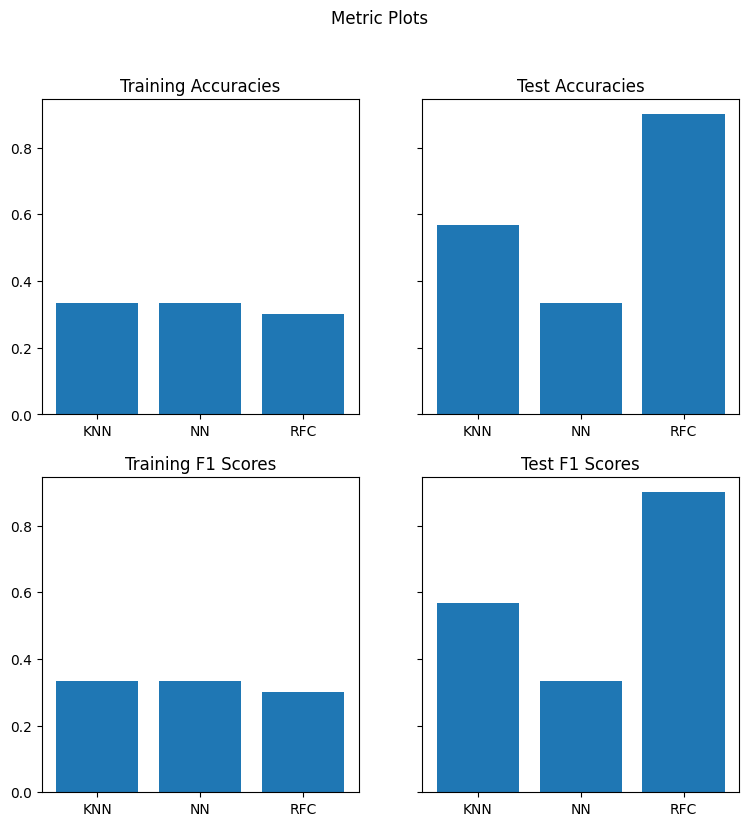

In [1606]:
# make models
KNN = KNeighborsClassifier(n_neighbors=12)
NN = MLPClassifier(
        hidden_layer_sizes=(
            729,
            243,
            81,
            27,
            3,
        ),
        random_state=1,
        max_iter=16,
        solver='adam',
        activation='relu'
    )
RFC = RandomForestClassifier()

# define parameters
models = [KNN, NN, RFC]
train_file = 'big_chunker.csv'
test_file = 'KD4_features.csv'

# lists for storing accuracies and f1 scores
train_accs = []
test_accs = []
train_f1s = []
test_f1s = []

# add metrics to lists
for model in models:
    train_acc, test_acc, train_f1, test_f1 = model_performance(model, train_file, test_file)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

# make training accuracy graph
# x = [x_pos*0.5 for x_pos in range(1,len(models)+1)]
# plt.bar(models, train_accs)

graph_labels = ['KNN', 'NN', 'RFC']

fig, axs = plt.subplots(2, 2, figsize=(9, 9), sharey=True)

axs[0, 0].bar(graph_labels, train_accs)
axs[0, 1].bar(graph_labels, test_accs)
axs[1, 0].bar(graph_labels, train_f1s)
axs[1, 1].bar(graph_labels, test_f1s)

axs[0, 0].title.set_text('Training Accuracies')
axs[0, 1].title.set_text('Test Accuracies')
axs[1, 0].title.set_text('Training F1 Scores')
axs[1, 1].title.set_text('Test F1 Scores')

fig.suptitle('Metric Plots')


In [1605]:
axs[0]

array([<Axes: >, <Axes: >], dtype=object)

In [1307]:
# load data from mat file
# mat = scipy.io.loadmat("exampleEMGdata180trial_train.mat")

# load feature data from csv
features = pd.read_csv('big_chunker.csv')
test_features = pd.read_csv('KD4_features.csv')
# test_features = pd.read_csv('feature_table.csv')

# make individual label tensor / column
labels = features.pop('labels')
test_labels = test_features.pop('labels')

# test_features

In [1308]:
# make rms features
rms_headers = [f"RMS ch {num}" for num in [x+1 for x in range(4)]]
rms_features = features[rms_headers]

# make wl features
wl_headers = [f"WL ch {num}" for num in [x+1 for x in range(4)]]
wl_features = features[wl_headers]

# make var features
var_headers = [f"VAR ch {num}" for num in [x+1 for x in range(4)]]
var_features = features[var_headers]

# make iemg features
iemg_headers = [f"IEMG ch {num}" for num in [x+1 for x in range(4)]]
iemg_features = features[iemg_headers]

# make mf features
mf_headers = [f"MF ch {num}" for num in [x+1 for x in range(4)]]
mf_features = features[mf_headers]

# make pf features
pf_headers = [f"PF ch {num}" for num in [x+1 for x in range(4)]]
pf_features = features[pf_headers]

# make best feature
best_feature = pd.concat([mf_features, pf_features], axis=1, join='inner')

# make mf test features
test_mf_features = test_features[mf_headers]

# make pf test features
test_pf_features = test_features[pf_headers]

# make best test feature
test_best_feature = pd.concat([test_mf_features, test_pf_features], axis=1, join='inner')



In [1309]:
def get_accuracy(feature, label, t_features, t_labels, num_epochs):

#     METRICS = [
#       tf.keras.metrics.CategoricalAccuracy(name='accuracy')
# ]

    normalizer = tf.keras.layers.Normalization(axis=-1)

    normalizer.adapt(feature)

    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2187, activation='relu'),
        tf.keras.layers.Dense(729, activation='relu'),
        tf.keras.layers.Dense(243, activation='relu'),
        tf.keras.layers.Dense(81, activation='relu'),
        tf.keras.layers.Dense(27, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    model.fit(feature, label, epochs=num_epochs, verbose=0)

    loss, acc = model.evaluate(t_features, t_labels)

    return acc

In [1402]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(best_feature)

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(2187, activation='relu'),
    tf.keras.layers.Dense(729, activation='relu'),
    tf.keras.layers.Dense(243, activation='relu'),
    tf.keras.layers.Dense(81, activation='relu'),
    tf.keras.layers.Dense(27, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            # metrics=tf.keras.metrics.CategoricalAccuracy(name='accuracy')
            metrics=['accuracy']
            )

model.fit(best_feature, labels, epochs=16)

loss, acc = model.evaluate(test_best_feature, test_labels)

Epoch 1/16


c:\Users\mampane\OneDrive - Olin College of Engineering\Desktop\Olin\Second Year First Semester\Neurotech\rps_classifier\rps_classifier\.venv\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 0s 3ms/step - loss: 1.1143 - accuracy: 0.3100
Epoch 2/16
10/10 [==============================] - 0s 3ms/step - loss: 1.0877 - accuracy: 0.3833
Epoch 3/16
10/10 [==============================] - 0s 3ms/step - loss: 1.0681 - accuracy: 0.4467
Epoch 4/16
10/10 [==============================] - 0s 3ms/step - loss: 1.0565 - accuracy: 0.4267
Epoch 5/16
10/10 [==============================] - 0s 3ms/step - loss: 1.0339 - accuracy: 0.4833
Epoch 6/16
10/10 [==============================] - 0s 3ms/step - loss: 1.0264 - accuracy: 0.4800
Epoch 7/16
10/10 [==============================] - 0s 3ms/step - loss: 1.0059 - accuracy: 0.4800
Epoch 8/16
10/10 [==============================] - 0s 3ms/step - loss: 0.9866 - accuracy: 0.5067
Epoch 9/16
10/10 [==============================] - 0s 3ms/step - loss: 0.9692 - accuracy: 0.5100
Epoch 10/16
10/10 [==============================] - 0s 3ms/step - loss: 0.9590 - accuracy: 0.5000
Epoch 11/16
10/10 [===========

c:\Users\mampane\OneDrive - Olin College of Engineering\Desktop\Olin\Second Year First Semester\Neurotech\rps_classifier\rps_classifier\.venv\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [1548]:
data = np.asarray(best_feature)
labels = np.asarray(labels)

x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, shuffle=True, stratify=labels
)

test_array = np.asarray(test_best_feature)
test_labels_array = np.asarray(test_labels)

# model = RandomForestClassifier()

# model = MLPClassifier(
#     hidden_layer_sizes=(
#         2187,
#         729,
#         243,
#         81,
#         27,
#         3,
#     ),
#     random_state=1,
#     max_iter=16,
#     solver='adam',
#     activation='relu'
# )
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

model = KNeighborsClassifier(n_neighbors=12)

model.fit(x_train, y_train)

# test_scaler = StandardScaler()
# test_scaler.fit(test_array)
# test_array = test_scaler.transform(test_array)

y_predict = model.predict(x_test)
test_predict = model.predict(test_array)

# Training data validation
# score = accuracy_score(y_test, y_predict)

# Test data validation

# score = f1_score(test_labels_array, test_predict, average='micro')
score = accuracy_score(test_labels, test_predict)

print(f"{score*100}% of samples were classified correctly!")

56.666666666666664% of samples were classified correctly!


In [1316]:
prediction_vector = model.predict(test_best_feature)
resubstitution_vector = model.predict(best_feature)

c:\Users\mampane\OneDrive - Olin College of Engineering\Desktop\Olin\Second Year First Semester\Neurotech\rps_classifier\rps_classifier\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\mampane\OneDrive - Olin College of Engineering\Desktop\Olin\Second Year First Semester\Neurotech\rps_classifier\rps_classifier\.venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [1317]:
new_pvector = [list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) for idx in range(len(prediction_vector))]
new_rvector = [list(resubstitution_vector[idx]).index(max(list(resubstitution_vector)[idx])) for idx in range(len(resubstitution_vector))]


TypeError: 'numpy.int64' object is not iterable

In [ ]:
correct_predictions = [list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) for idx in range(len(prediction_vector)) if list(prediction_vector[idx]).index(max(list(prediction_vector)[idx])) == test_labels[idx]]

In [ ]:
len(correct_predictions)/len(prediction_vector)

0.7666666666666667

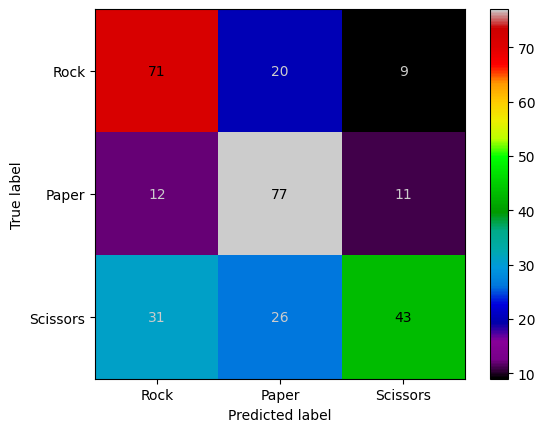

In [ ]:
# train confusion matrix
confusion_matrix = metrics.confusion_matrix(labels, new_rvector) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rock", "Paper", "Scissors"])
cm_display.plot(cmap = "nipy_spectral")
plt.show()

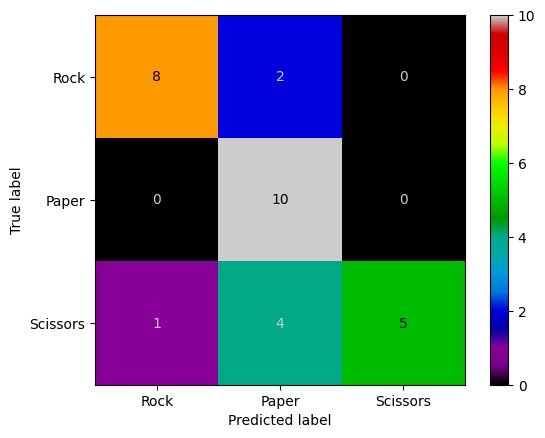

In [ ]:
# test confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, new_pvector) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Rock", "Paper", "Scissors"])
cm_display.plot(cmap = "nipy_spectral")
plt.show()

In [ ]:
# list(range(21))[1:]

In [ ]:
# accuracies = []

# for num in list(range(21))[1:]:
#     accuracies.append(get_accuracy(best_feature, labels, test_best_feature, test_labels, num))

In [ ]:
# print(f'num_epochs: {accuracies.index(max(accuracies))+1}, max_accuracy: {max(accuracies)}')
